In [1]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from src.ocsvm.OneClassSVMClassifier import OneClassSVMClassifier
import numpy as np
import matplotlib.pyplot as plt
import torch

# Load Iris Flower Dataset
iris = datasets.load_iris()
feature_names = iris.feature_names
X = iris.data

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Experiment 1.1


Number of Instances: 150 (50 in each of three classes)

Number of Attributes: 4 (numeric)

Attribute Information: sepal length in cm, sepal width in cm, petal length in cm, petal width in cm

Class: Iris-Setosa, Iris-Versicolour, Iris-Virginica


Let us consider only 2 features for easy visualization - sepal length in cm, sepal width in cm

Since we are doing unsupervised learning, we will not consider the classes of the data samples.

In [2]:
X_scaled=X_scaled[:,:-2]
X_scaled.shape

(150, 2)

In [3]:
feature_names = feature_names[:-2]
feature_names

['sepal length (cm)', 'sepal width (cm)']

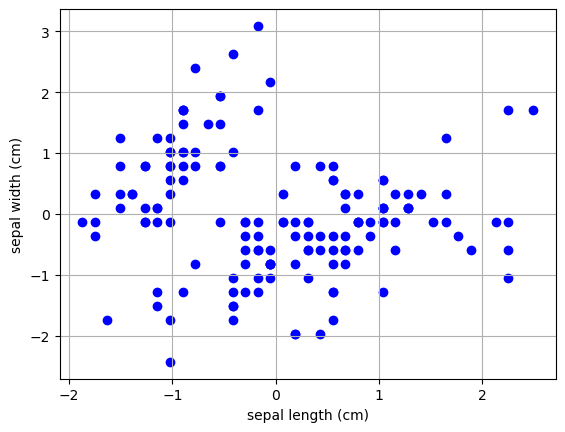

In [4]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], color='b')
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.grid()
plt.show()

In [5]:
x_data = torch.tensor(X_scaled)

In [6]:
# Create a OCSVM Classifier Class
classifier = OneClassSVMClassifier(x_data, nu=0.1, num_inducing_points=x_data.shape[0])

In [7]:
decision, y_pred = classifier.fit()

In [8]:
# Check for the number of outliers

counts = {1: np.sum(y_pred == 1), -1: np.sum(y_pred == -1)}
total = len(y_pred)
percentages = {key: (count / total) * 100 for key, count in counts.items()}

results = {key: {"count": counts[key], "percentage": percentages[key]} for key in counts}

print(results)

{1: {'count': 125, 'percentage': 83.33333333333334}, -1: {'count': 24, 'percentage': 16.0}}


In [ ]:
# Outlier sample indices
indices = [i for i, value in enumerate(y_pred) if value == -1]
indices

[13, 15, 22, 32, 33, 41, 56, 60, 62, 68, 87, 100, 117, 118, 119, 122, 131]

In [ ]:
classifier.plot(-5, 5, -5, 5)

AttributeError: 'OneClassSVM' object has no attribute 'plot_ocsvm'

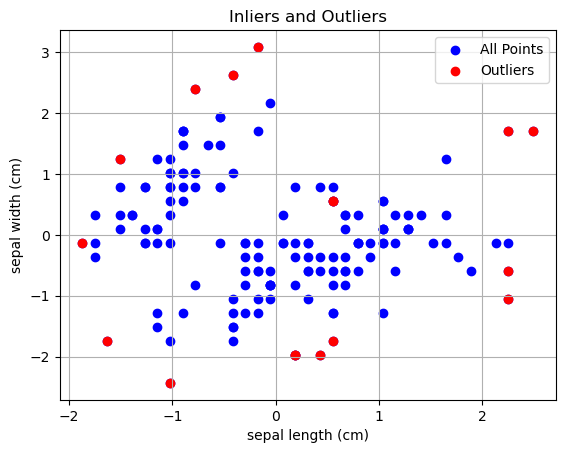

In [21]:
# Plot outliers with inliers
plt.scatter(x_data[:, 0], x_data[:, 1], color='blue', label='All Points')
outliers = x_data[indices]
plt.scatter(outliers[:, 0], outliers[:, 1], color='red', label='Outliers')
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.title('Inliers and Outliers')
plt.legend()
plt.grid()
plt.show()

In [22]:
outlier_features = x_data[indices]

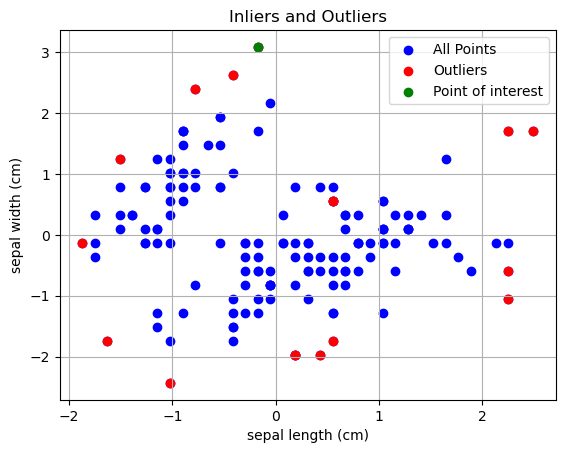

In [23]:
plt.scatter(x_data[:, 0], x_data[:, 1], color='blue', label='All Points')
outliers = x_data[indices]
plt.scatter(outliers[:, 0], outliers[:, 1], color='red', label='Outliers')
plt.scatter(x_data[15, 0], x_data[15, 1], color='green', label='Point of interest')
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.title('Inliers and Outliers')
plt.legend()
plt.grid()
plt.show()

The point with index 15 is a clear outlier and the reason should be bause of very high sepal width (>3 cm). 
This point should have a very high shapley value for sepal width.

In [24]:
from src.explanation_algorithms.OCSVMSHAP import OCSVMSHAP
ocsvm_shap = OCSVMSHAP(X=x_data, classifier=classifier)

AttributeError: 'OneClassSVM' object has no attribute 'decision'

In [15]:
ocsvm_shap.fit_ocsvmshap(X=x_data, num_coalitions=2**x_data.shape[1])

c:\Users\swath\Documents\CISPA\OCSVM-SHAP\src\utils\shapley_procedure\coalitions.py:18: RuntimeWarning: divide by zero encountered in log2
  set_to_1 = np.floor(np.log2(rest)).astype(int)
c:\Users\swath\Documents\CISPA\OCSVM-SHAP\src\utils\shapley_procedure\coalitions.py:18: RuntimeWarning: invalid value encountered in cast
  set_to_1 = np.floor(np.log2(rest)).astype(int)
c:\Users\swath\Documents\CISPA\OCSVM-SHAP\src\utils\shapley_procedure\coalitions.py:18: RuntimeWarning: invalid value encountered in log2
  set_to_1 = np.floor(np.log2(rest)).astype(int)
100%|██████████| 3/3 [00:00<00:00, 81.94it/s]


IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


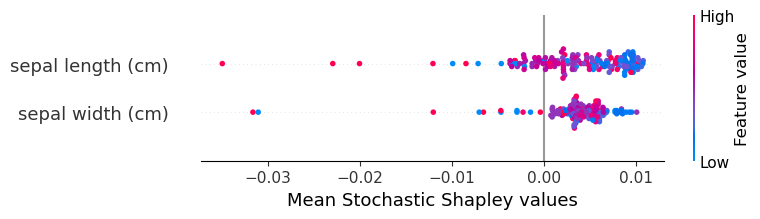

In [16]:
from src.utils.visualisation.deterministic_values import summary_plot, bar_plot
mean_stochastic_shapley_values = ocsvm_shap.return_deterministic_shapley_values()
summary_plot(mean_stochastic_shapley_values, x_data, feature_names=feature_names)
plt.xlabel("Mean Stochastic Shapley values")
plt.show()

The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\TensorShape.cpp:3618.)


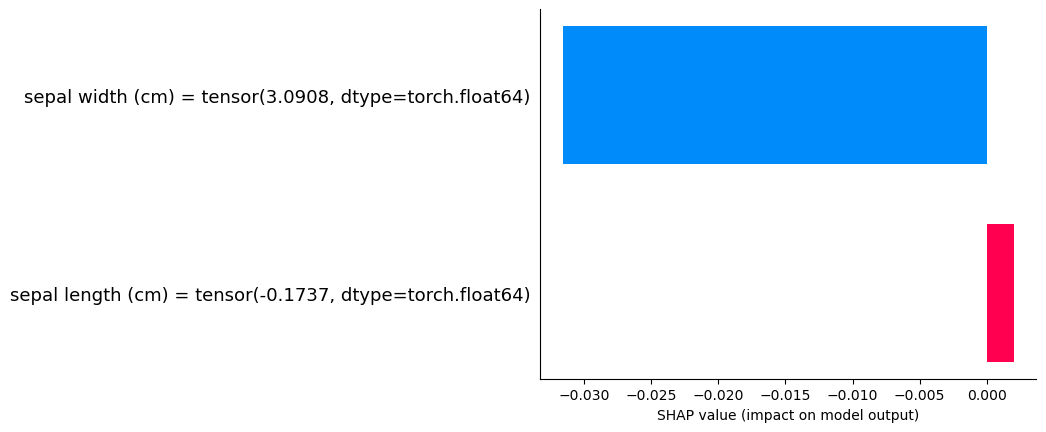

In [17]:
bar_plot(mean_stochastic_shapley_values.T[15], x_data[15], feature_names = feature_names)

As expected, the sepal width has the highest impact in deciding that this point is an outlier

## Experiment 1.2

Let us now consider all 4 features of the iris dataset

In [18]:
iris = datasets.load_iris()
feature_names = iris.feature_names
X = iris.data

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled.shape

(150, 4)

In [19]:
feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [20]:
x_data = torch.tensor(X_scaled)

In [24]:
# Create a OCSVM Classifier Class
classifier = OneClassSVMClassifier(x_data, nu=0.1, num_inducing_points=x_data.shape[0])

In [25]:
decision, y_pred = classifier.fit()

[  8  13  14  15  22  32  33  41  42  60  62  68 100 106 109 114 117 118
 122 131 136 148]


In [26]:
# Check for the number of outliers

counts = {1: np.sum(y_pred == 1), -1: np.sum(y_pred == -1)}
total = len(y_pred)
percentages = {key: (count / total) * 100 for key, count in counts.items()}

results = {key: {"count": counts[key], "percentage": percentages[key]} for key in counts}

print(results)

{1: {'count': 141, 'percentage': 94.0}, -1: {'count': 9, 'percentage': 6.0}}


In [27]:
# Outlier sample indices
indices = [i for i, value in enumerate(y_pred) if value == -1]
indices

[13, 15, 33, 41, 60, 117, 118, 122, 131]

In [28]:
from src.explanation_algorithms.OCSVMSHAP import OCSVMSHAP
ocsvm_shap = OCSVMSHAP(X=x_data, classifier=classifier)

In [29]:
ocsvm_shap.fit_ocsvmshap(X=x_data, num_coalitions=2**x_data.shape[1])

divide by zero encountered in log2
invalid value encountered in cast
invalid value encountered in log2
100%|██████████| 15/15 [00:03<00:00,  4.93it/s]


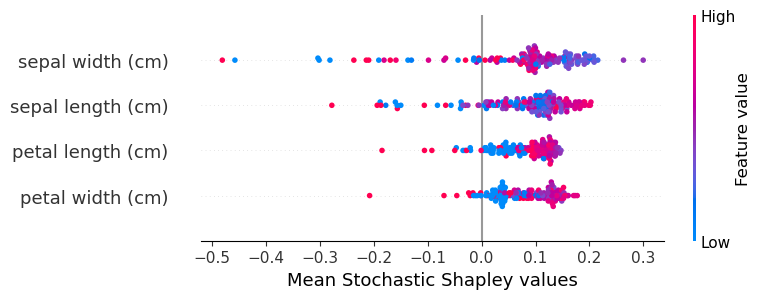

In [31]:
from src.utils.visualisation.deterministic_values import summary_plot, bar_plot
mean_stochastic_shapley_values = ocsvm_shap.return_deterministic_shapley_values()
summary_plot(mean_stochastic_shapley_values, x_data, feature_names=feature_names)
plt.xlabel("Mean Stochastic Shapley values")
plt.show()

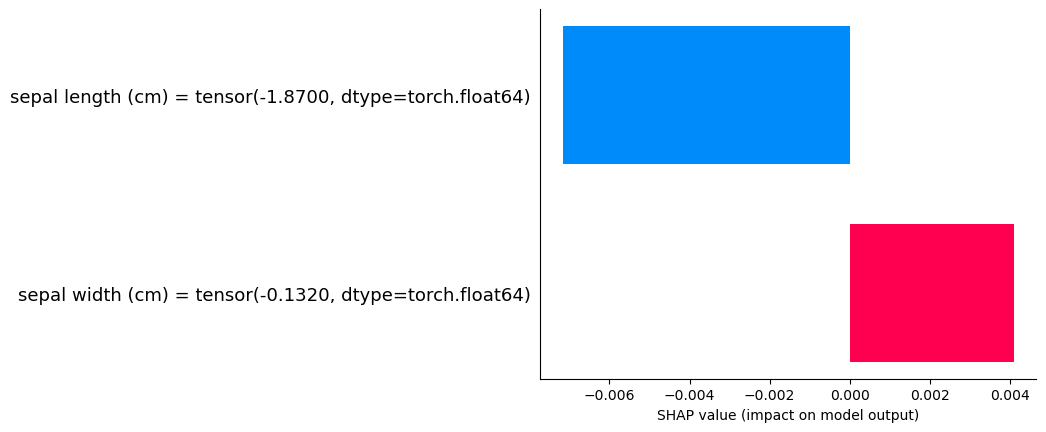

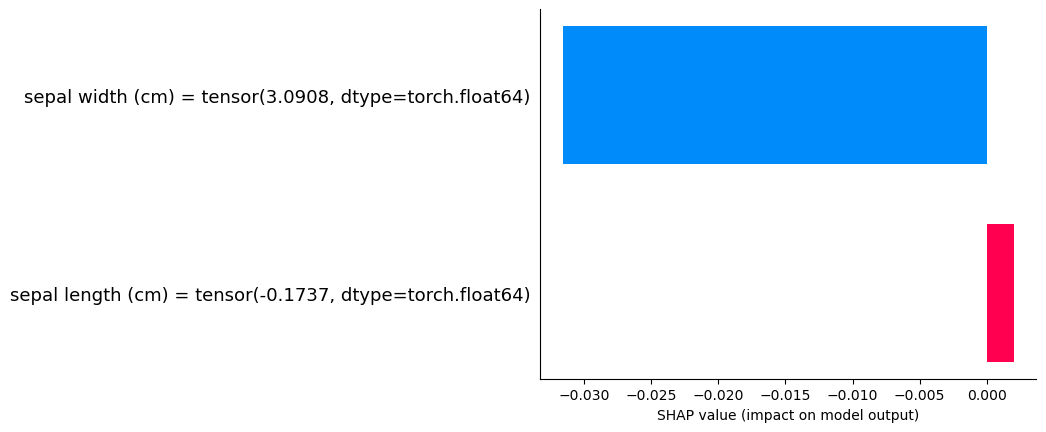

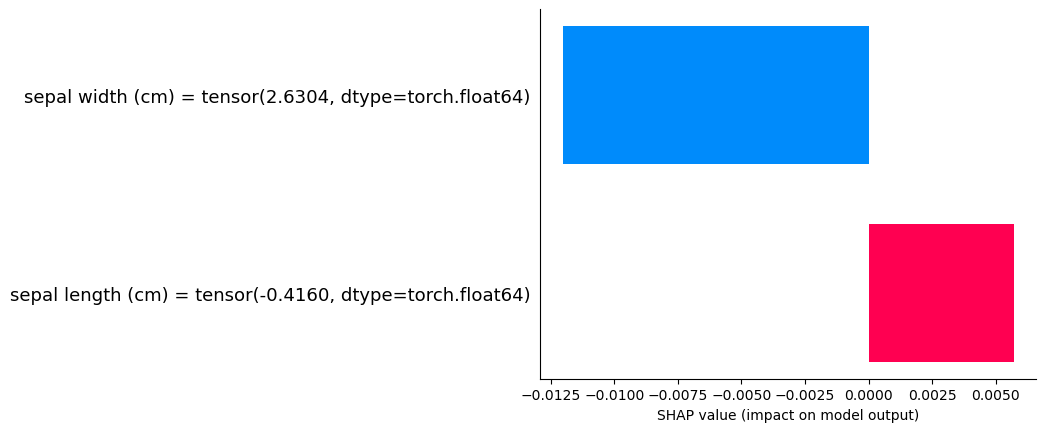

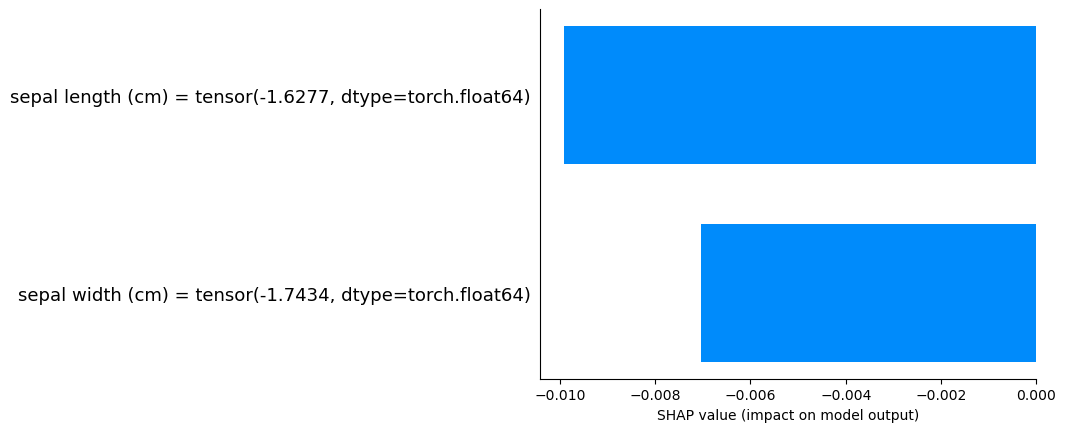

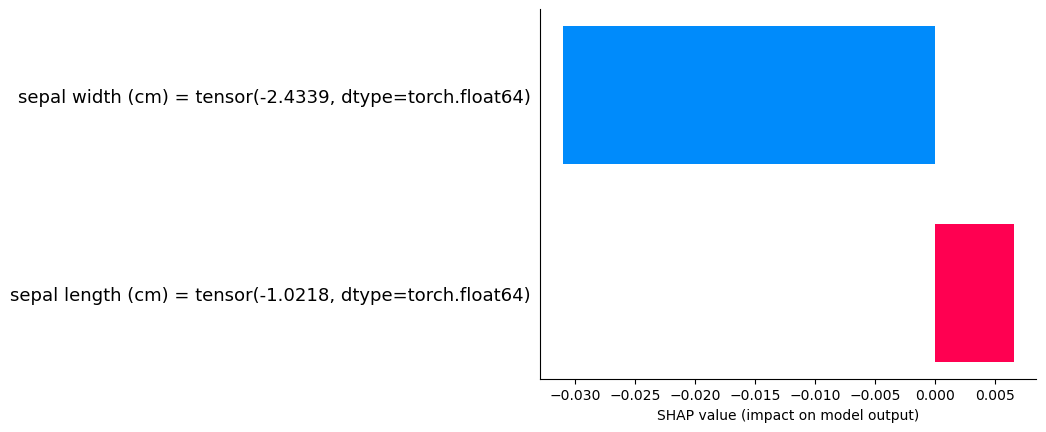

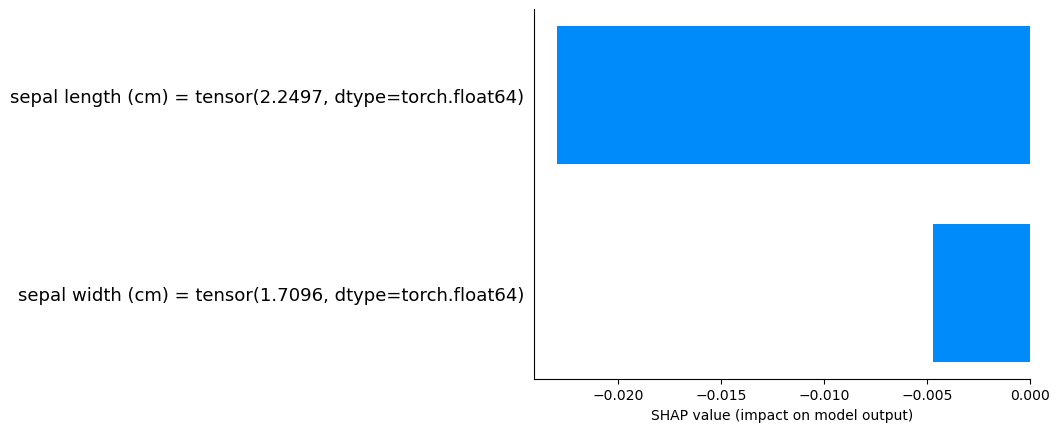

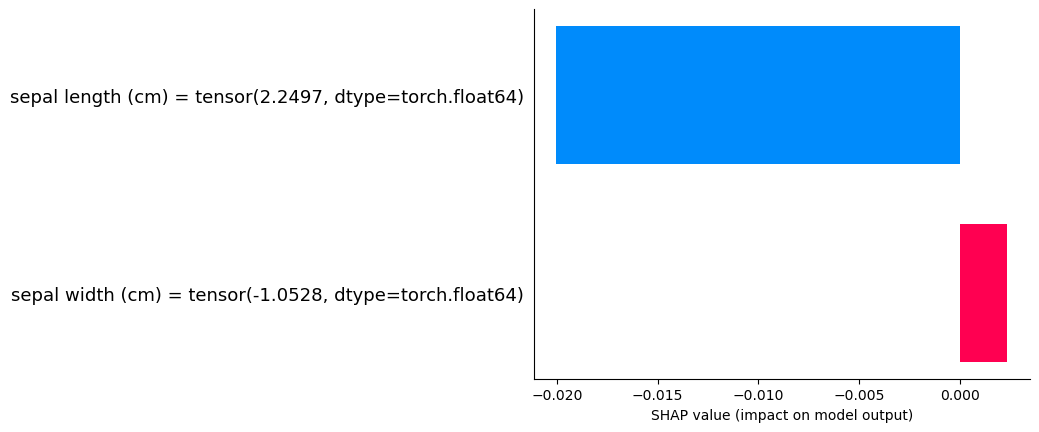

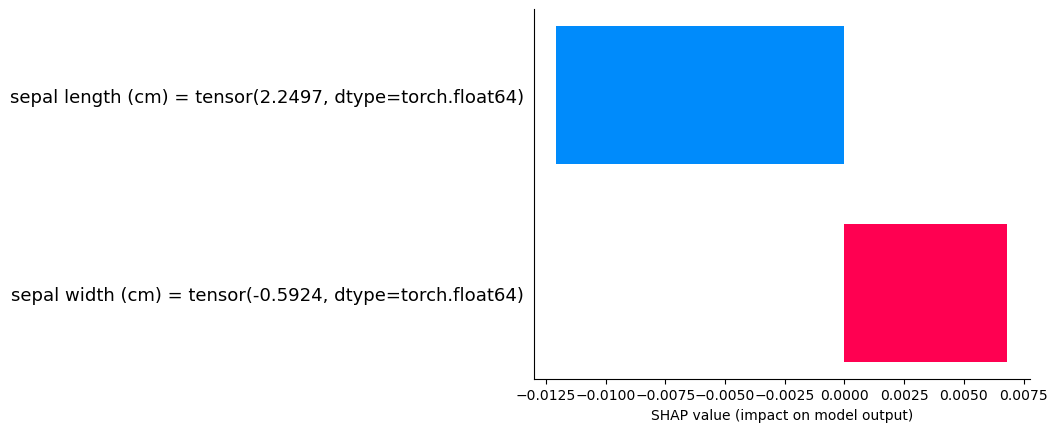

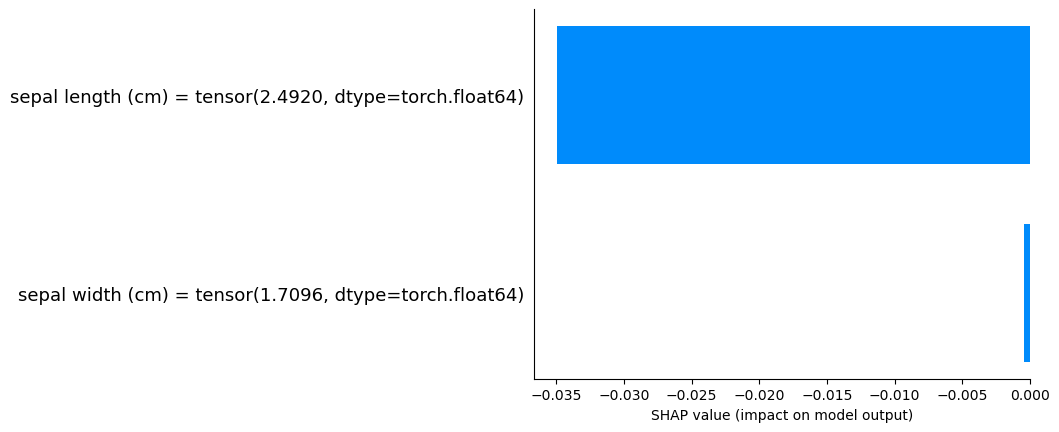

In [31]:
# Bar plot to dipict the contributiion of each feature to all the outliers
for i in indices:  
    bar_plot(mean_stochastic_shapley_values.T[i], x_data[i], feature_names=feature_names)

## Experiment 1.3

With the same Iris dataset, let us now consider all points from the first 2 classes and just 2 points from the 3rd class. The points in the 3rd class must be outliers (may not be always true?)

In [32]:
import pandas as pd

iris = datasets.load_iris()
feature_names = iris.feature_names
data = pd.DataFrame(data=iris.data, columns=feature_names)
data['target'] = iris.target

In [33]:
setosa_versicolor = data[data['target'] < 2]  # All Setosa and Versicolor
virginica = data[data['target'] == 2].sample(n=2, random_state=42)  # 2 random points from Virginica

In [34]:
x_data = pd.concat([setosa_versicolor, virginica], ignore_index=True)
x_data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
97,6.2,2.9,4.3,1.3,1
98,5.1,2.5,3.0,1.1,1
99,5.7,2.8,4.1,1.3,1
100,5.7,2.5,5.0,2.0,2


In [35]:
targets = x_data.iloc[:, -1].to_numpy()
targets


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2])

In [36]:
x_data = x_data.drop(x_data.columns[-1], axis=1)
x_data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
97,6.2,2.9,4.3,1.3
98,5.1,2.5,3.0,1.1
99,5.7,2.8,4.1,1.3
100,5.7,2.5,5.0,2.0


In [37]:
feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [38]:
x_data = torch.tensor(x_data.values)

In [39]:
classifier = OneClassSVMClassifier(x_data, nu=0.1)

In [40]:
decision, y_pred = classifier.fit()

[ 13  14  15  22  33  41  50  52  57  60  62  84 100 101]


In [41]:
# Check for the number of outliers

counts = {1: np.sum(y_pred == 1), -1: np.sum(y_pred == -1)}
total = len(y_pred)
percentages = {key: (count / total) * 100 for key, count in counts.items()}

results = {key: {"count": counts[key], "percentage": percentages[key]} for key in counts}

print(results)

{1: {'count': 92, 'percentage': 90.19607843137256}, -1: {'count': 9, 'percentage': 8.823529411764707}}


In [42]:
# Outlier sample indices
indices = [i for i, value in enumerate(y_pred) if value == -1]
indices

[13, 14, 15, 41, 50, 57, 60, 100, 101]

In [43]:
points_from_3rd_class = np.where(targets == 2)[0]
points_from_3rd_class

array([100, 101], dtype=int64)

In [44]:
all_outliers_recognized = np.all(np.isin(points_from_3rd_class, indices))
all_outliers_recognized

True

The 2 points from the class virginica have been recognized as outliers


OCSVM-SHAP has not been run here as the goal of this experiement is to verify the classifier

## Experiment 1.4
Now consider the same setting as 1.3, but with just 2 features for easy visualization

In [45]:
import pandas as pd

iris = datasets.load_iris()
feature_names = iris.feature_names
data = pd.DataFrame(data=iris.data, columns=feature_names)
data['target'] = iris.target

In [46]:
setosa_versicolor = data[data['target'] < 2]  # All Setosa and Versicolor
virginica = data[data['target'] == 2].sample(n=2, random_state=42)  # 2 random points from Virginica

In [47]:
x_data = pd.concat([setosa_versicolor, virginica], ignore_index=True)
x_data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
97,6.2,2.9,4.3,1.3,1
98,5.1,2.5,3.0,1.1,1
99,5.7,2.8,4.1,1.3,1
100,5.7,2.5,5.0,2.0,2


In [48]:
targets = x_data.iloc[:, -1].to_numpy()
targets

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2])

In [49]:
x_data = x_data.drop(x_data.columns[-3:], axis=1)
x_data

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
97,6.2,2.9
98,5.1,2.5
99,5.7,2.8
100,5.7,2.5


In [50]:
feature_names = feature_names[:-2]
feature_names

['sepal length (cm)', 'sepal width (cm)']

In [51]:
x_data

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
97,6.2,2.9
98,5.1,2.5
99,5.7,2.8
100,5.7,2.5


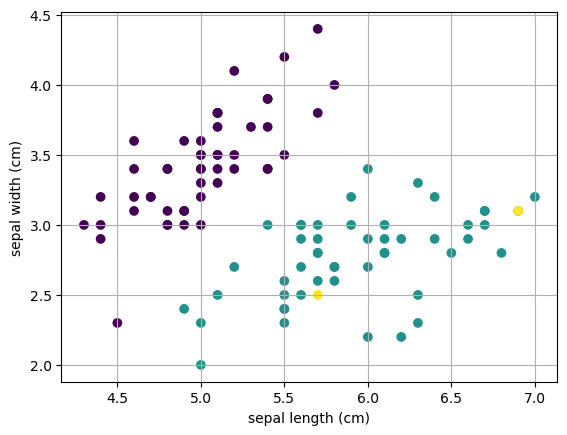

In [52]:
plt.scatter(x_data[feature_names[0]], x_data[feature_names[1]], c=targets, cmap='viridis')
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.grid()
plt.show()

In [53]:
x_data = torch.tensor(x_data.values)

In [54]:
classifier = OneClassSVMClassifier(x_data, nu=0.1, num_inducing_points=x_data.shape[0])

In [55]:
decision, y_pred = classifier.fit()

[ 13  14  15  22  32  33  41  50  52  60  62  66  68  85  87  88 101]


In [56]:
counts = {1: np.sum(y_pred == 1), -1: np.sum(y_pred == -1)}
total = len(y_pred)
percentages = {key: (count / total) * 100 for key, count in counts.items()}

results = {key: {"count": counts[key], "percentage": percentages[key]} for key in counts}

print(results)

{1: {'count': 94, 'percentage': 92.15686274509804}, -1: {'count': 6, 'percentage': 5.88235294117647}}


In [57]:
indices = [i for i, value in enumerate(y_pred) if value == -1]
indices

[13, 15, 22, 50, 60, 68]

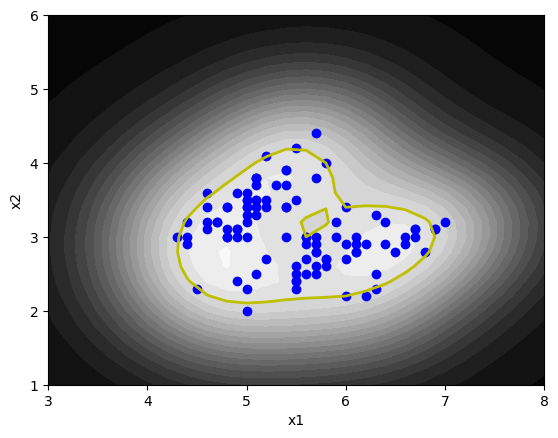

In [58]:
classifier.plot(3, 8, 1, 6)

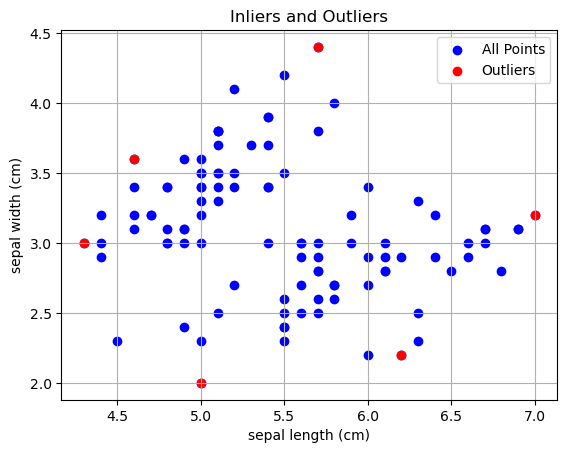

In [59]:
plt.scatter(x_data[:, 0], x_data[:, 1], color='blue', label='All Points')
outliers = x_data[indices]
plt.scatter(outliers[:, 0], outliers[:, 1], color='red', label='Outliers')
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.title('Inliers and Outliers')
plt.legend()
plt.grid()
plt.show()

In [60]:
outlier_features = x_data[indices]
outlier_features

tensor([[4.3000, 3.0000],
        [5.7000, 4.4000],
        [4.6000, 3.6000],
        [7.0000, 3.2000],
        [5.0000, 2.0000],
        [6.2000, 2.2000]], dtype=torch.float64)

In [61]:
from src.explanation_algorithms.OCSVMSHAP import OCSVMSHAP
ocsvm_shap = OCSVMSHAP(X=x_data, classifier=classifier)

In [62]:
ocsvm_shap.fit_ocsvmshap(X=x_data, num_coalitions=2**x_data.shape[1])

divide by zero encountered in log2
invalid value encountered in cast
invalid value encountered in log2
100%|██████████| 3/3 [00:00<00:00, 1650.22it/s]


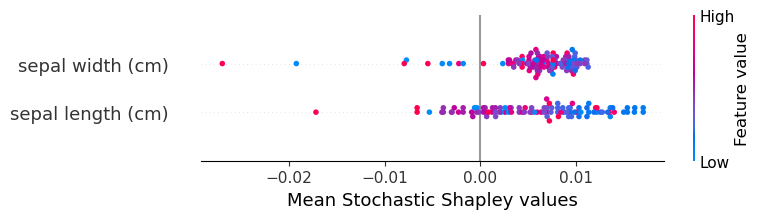

In [63]:
from src.utils.visualisation.deterministic_values import summary_plot,bar_plot
mean_stochastic_shapley_values = ocsvm_shap.return_deterministic_shapley_values()
summary_plot(mean_stochastic_shapley_values, x_data, feature_names=feature_names)
plt.xlabel("Mean Stochastic Shapley values")
plt.show()

As expected, sepal width has the highest shapley value.

Out of the 2 chosen points from the class 3, only 1 was found as an outlier (beacuse 2 features were omitted for simplicity)

Let us find the explanation for only point from class 3 found as an oulier

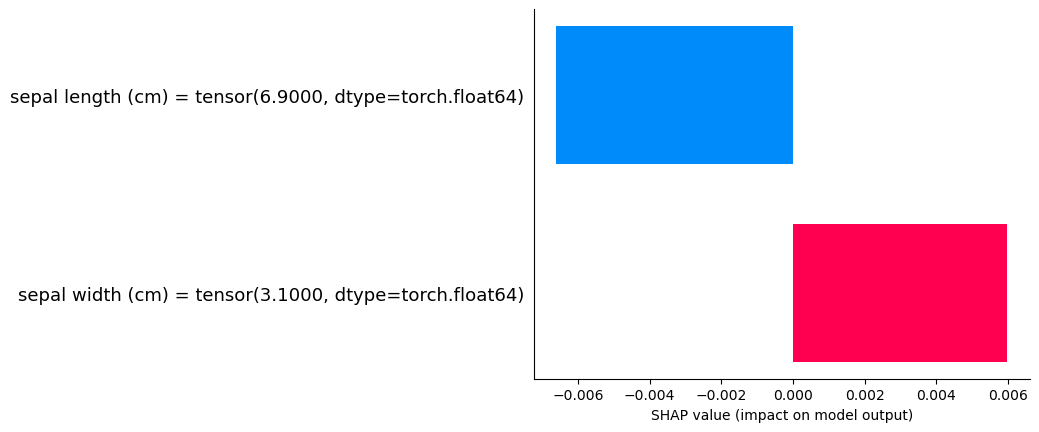

In [66]:
bar_plot(mean_stochastic_shapley_values.T[101], x_data[101], feature_names = feature_names)

Sepal width feature is causing it to be an outlier.

The other point from 3rd class is not detected as an outlier(maybe due to missing features)

## Experiment 1.5

Consider wine dataset with 5 features

In [74]:
wine = datasets.load_wine()

# Create a DataFrame with the feature names
df = pd.DataFrame(wine.data, columns=wine.feature_names)

feature_names = ['alcohol', 'malic_acid', 'total_phenols', 'flavanoids', 'color_intensity']
x_data = df[feature_names]
x_data

,alcohol,malic_acid,total_phenols,flavanoids,color_intensity
0,14.23,1.71,2.80,3.06,5.64
1,13.20,1.78,2.65,2.76,4.38
2,13.16,2.36,2.80,3.24,5.68
3,14.37,1.95,3.85,3.49,7.80
4,13.24,2.59,2.80,2.69,4.32
...,...,...,...,...,...
173,13.71,5.65,1.68,0.61,7.70
174,13.40,3.91,1.80,0.75,7.30
175,13.27,4.28,1.59,0.69,10.20
176,13.17,2.59,1.65,0.68,9.30


In [75]:
x_data

,alcohol,malic_acid,total_phenols,flavanoids,color_intensity
0,14.23,1.71,2.80,3.06,5.64
1,13.20,1.78,2.65,2.76,4.38
2,13.16,2.36,2.80,3.24,5.68
3,14.37,1.95,3.85,3.49,7.80
4,13.24,2.59,2.80,2.69,4.32
...,...,...,...,...,...
173,13.71,5.65,1.68,0.61,7.70
174,13.40,3.91,1.80,0.75,7.30
175,13.27,4.28,1.59,0.69,10.20
176,13.17,2.59,1.65,0.68,9.30


In [76]:
x_data = torch.tensor(X_scaled)

In [77]:
classifier = OneClassSVMClassifier(x_data, nu=0.1, gamma=0.3, num_inducing_points=x_data.shape[0])

0.16025262815379984


In [78]:
decision, y_pred = classifier.fit()

[0.14823917 0.99999999 0.88473219 1.         0.49046677 0.24777382
 0.99999998 1.         0.41266709 0.99999999 0.8328383  0.39912304
 0.35596516 0.85458351 0.18530348 0.56456331 1.         1.
 0.99999508 1.         0.16833479 0.4554094 ]
[  8  13  14  15  22  32  33  41  42  60  62  68 100 106 109 114 117 118
 122 131 136 148]
[[0.65639443 0.69052    0.71917284 ... 0.01632773 0.07394533 0.09574994]
 [0.9349042  0.91198129 0.35280741 ... 0.00779038 0.05760467 0.07529613]
 [0.90654054 0.92639056 0.43662382 ... 0.00700505 0.05300232 0.07008037]
 ...
 [0.06765946 0.04922384 0.06771571 ... 0.33987693 0.82037686 0.83184757]
 [0.04843981 0.03738958 0.08365186 ... 0.40959707 0.9928256  1.        ]
 [0.14122143 0.10719679 0.09538917 ... 0.20531977 0.75094862 0.79364281]]


In [79]:
counts = {1: np.sum(y_pred == 1), -1: np.sum(y_pred == -1)}
total = len(y_pred)
percentages = {key: (count / total) * 100 for key, count in counts.items()}

results = {key: {"count": counts[key], "percentage": percentages[key]} for key in counts}

print(results)

{1: {'count': 140, 'percentage': 93.33333333333333}, -1: {'count': 9, 'percentage': 6.0}}


In [80]:
indices = [i for i, value in enumerate(y_pred) if value == -1]
indices

[13, 15, 33, 41, 60, 117, 118, 122, 131]

In [81]:
outlier_features = x_data[indices]
outlier_features

tensor([[-1.8700, -0.1320, -1.5107, -1.4471],
        [-0.1737,  3.0908, -1.2834, -1.0522],
        [-0.4160,  2.6304, -1.3402, -1.3154],
        [-1.6277, -1.7434, -1.3971, -1.1838],
        [-1.0218, -2.4339, -0.1466, -0.2624],
        [ 2.2497,  1.7096,  1.6722,  1.3172],
        [ 2.2497, -1.0528,  1.7858,  1.4488],
        [ 2.2497, -0.5924,  1.6722,  1.0539],
        [ 2.4920,  1.7096,  1.5016,  1.0539]], dtype=torch.float64)

[-0.1737,  3.0908, -1.2834, -1.0522] is an outlier due to its 2nd feature(malic_acid)

In [82]:
from src.explanation_algorithms.OCSVMSHAP import OCSVMSHAP
ocsvm_shap = OCSVMSHAP(X=x_data, classifier=classifier)

In [83]:
ocsvm_shap.fit_ocsvmshap(X=x_data, num_coalitions=2**x_data.shape[1])

divide by zero encountered in log2
invalid value encountered in cast
invalid value encountered in log2
100%|██████████| 15/15 [00:03<00:00,  3.90it/s]


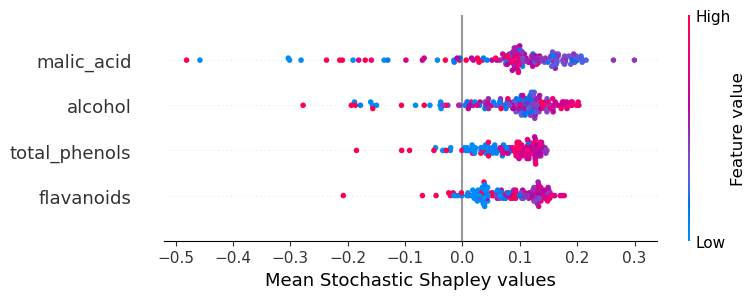

In [84]:
from src.utils.visualisation.deterministic_values import summary_plot,bar_plot
mean_stochastic_shapley_values = ocsvm_shap.return_deterministic_shapley_values()
summary_plot(mean_stochastic_shapley_values, x_data, feature_names=feature_names)
plt.xlabel("Mean Stochastic Shapley values")
plt.show()

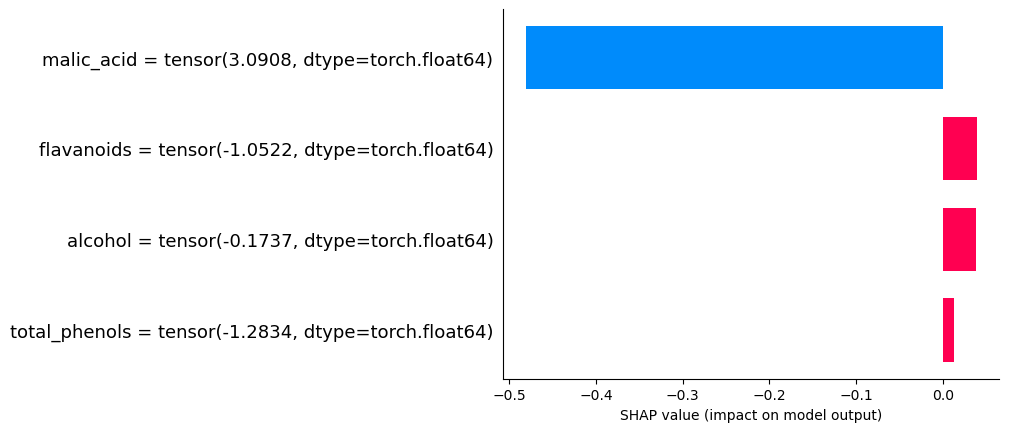

In [85]:
bar_plot(mean_stochastic_shapley_values.T[15], x_data[15], feature_names = feature_names)

As expected malic_acid has the highest shapley value

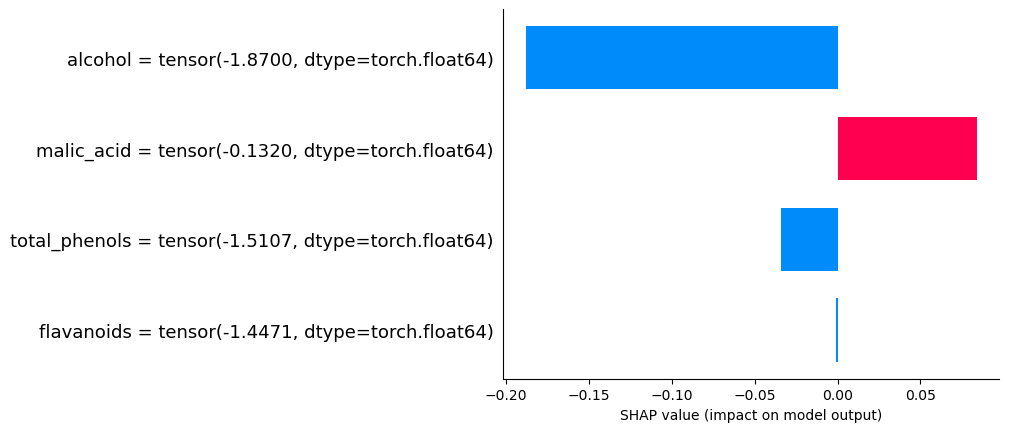

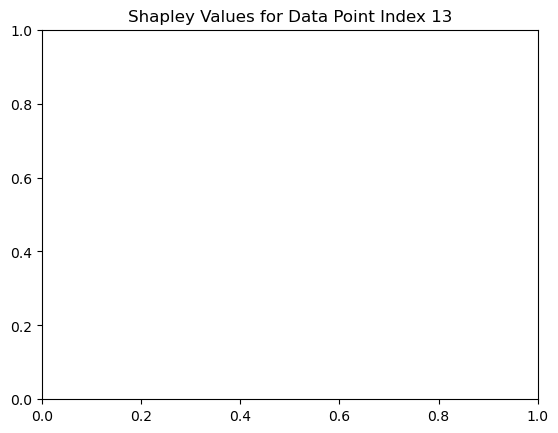

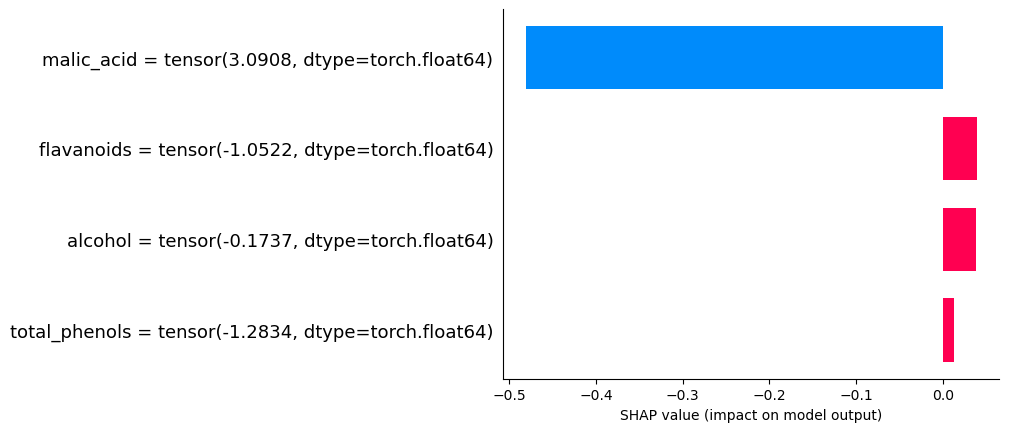

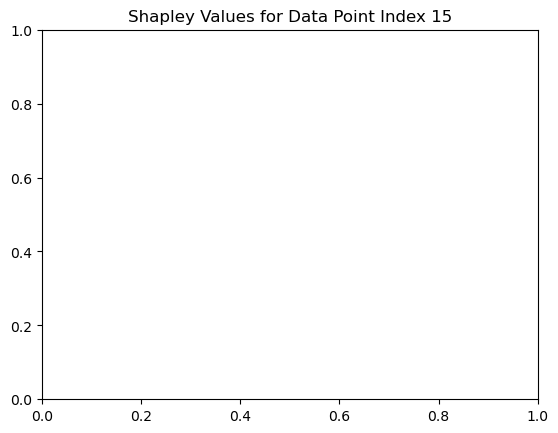

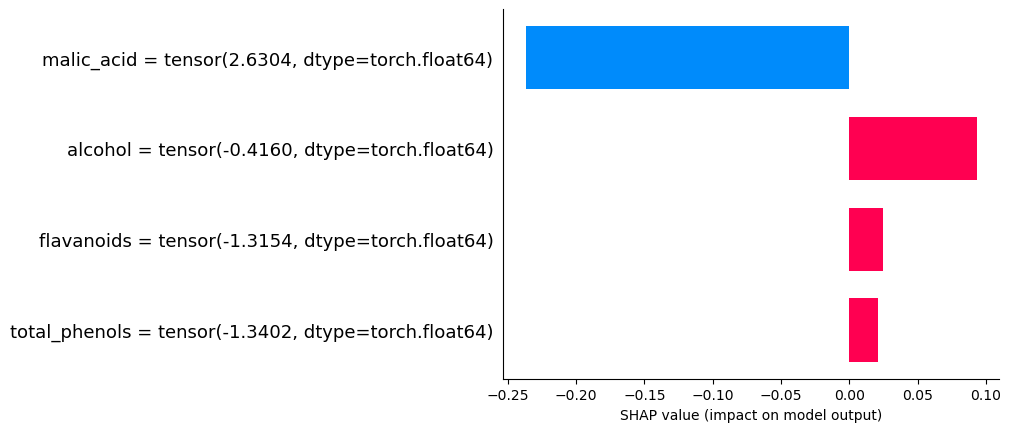

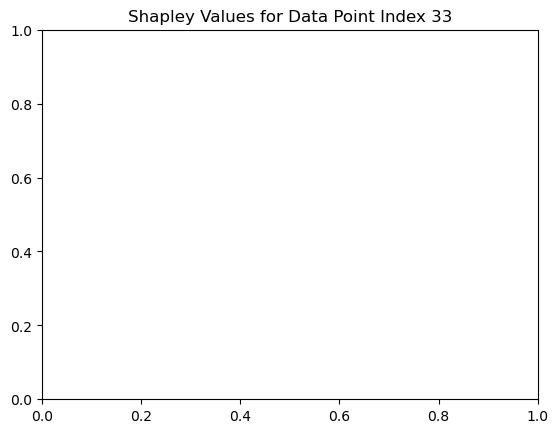

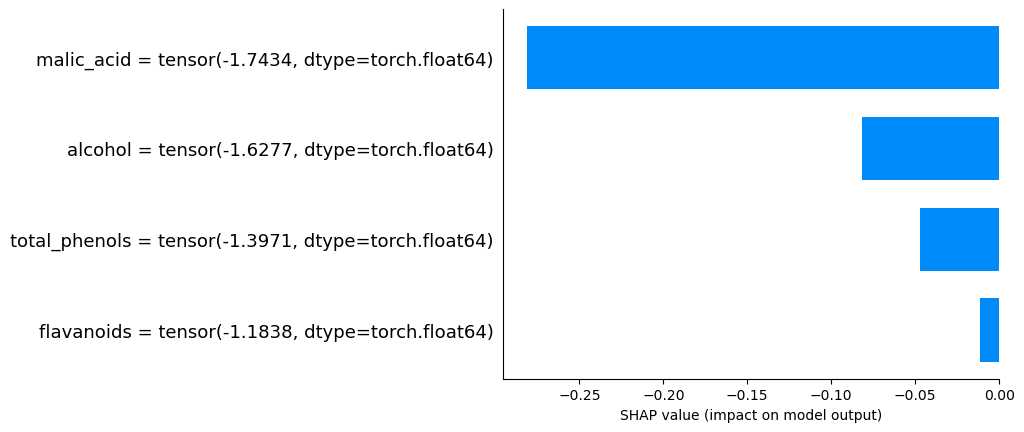

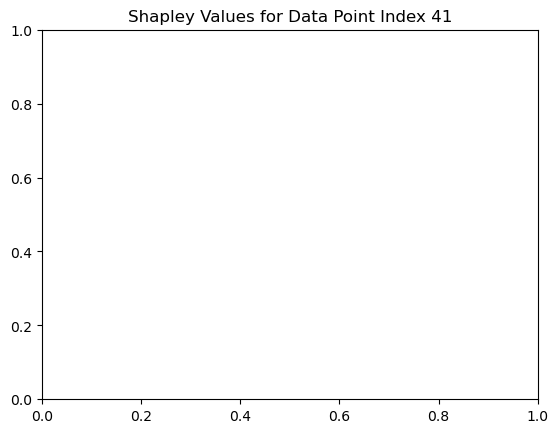

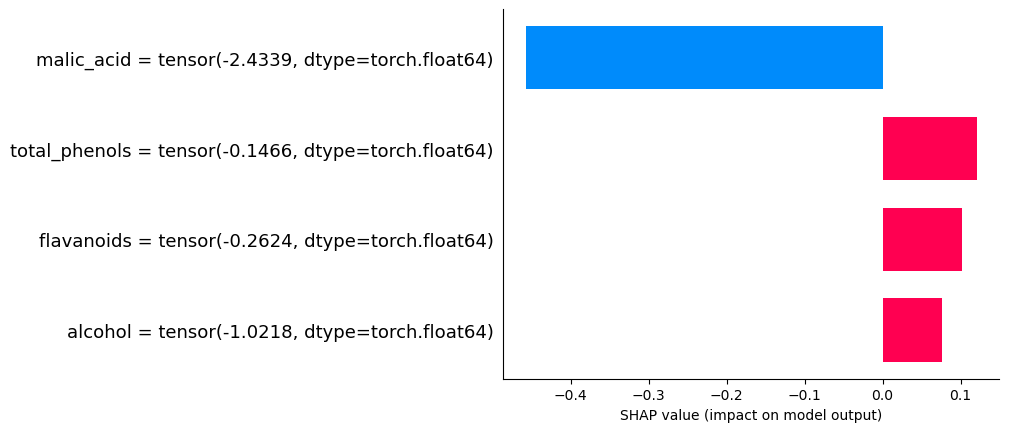

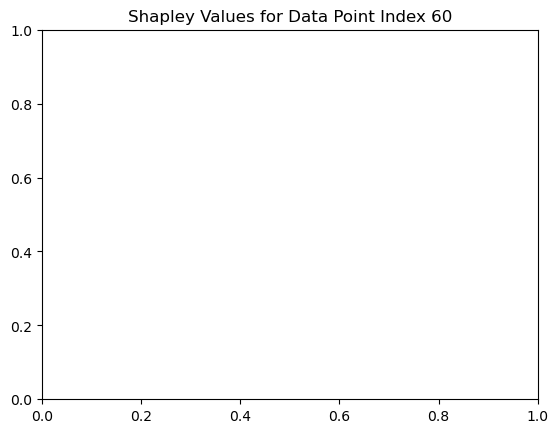

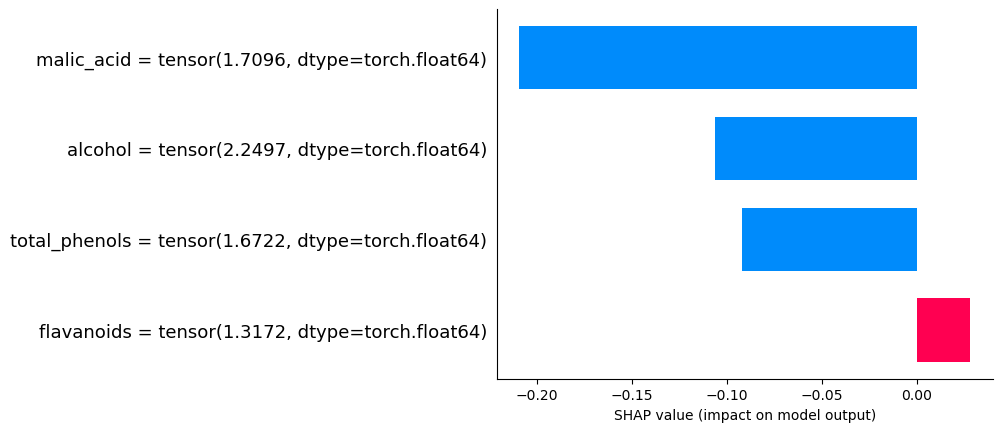

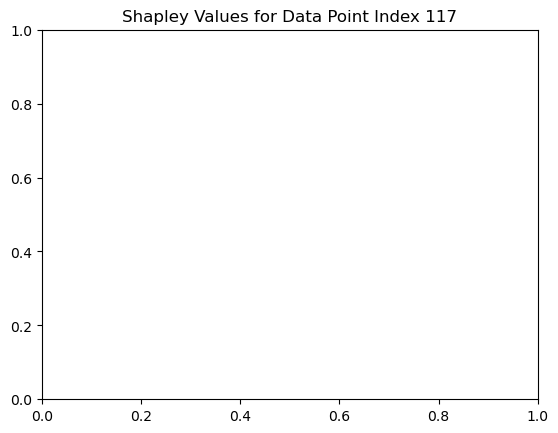

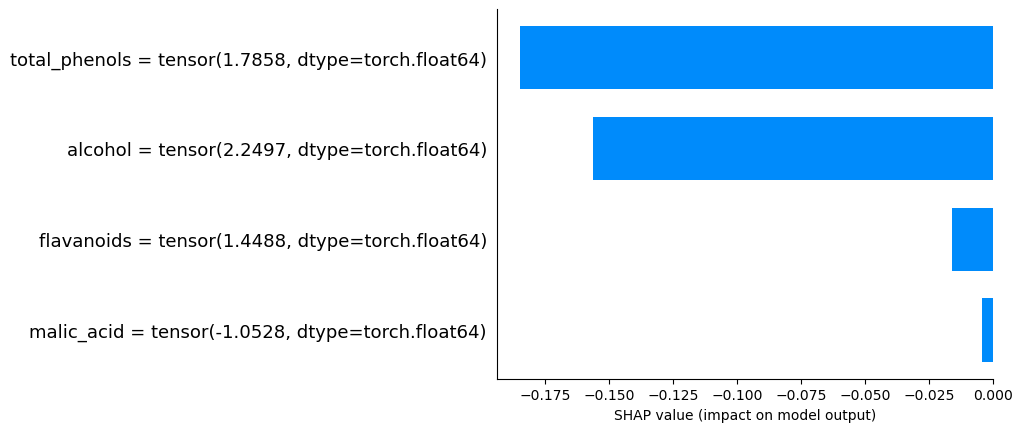

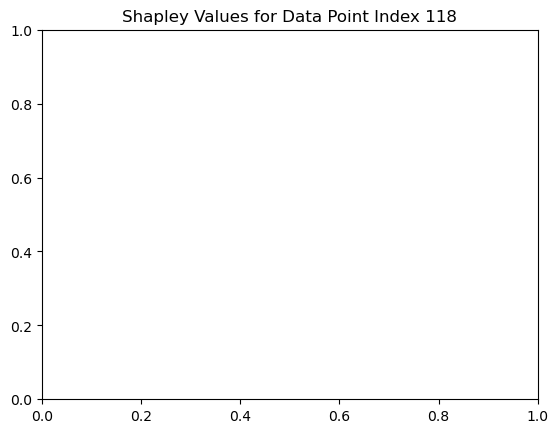

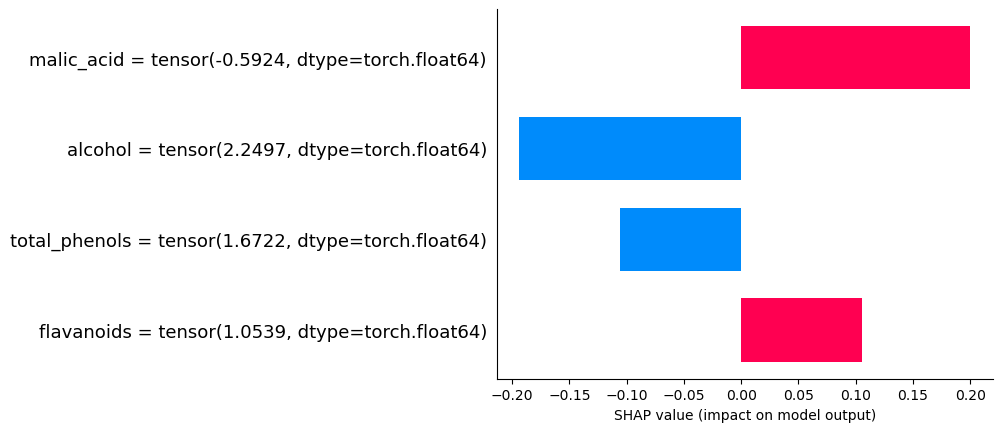

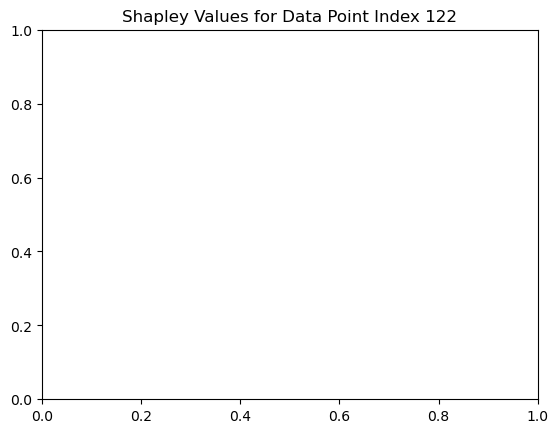

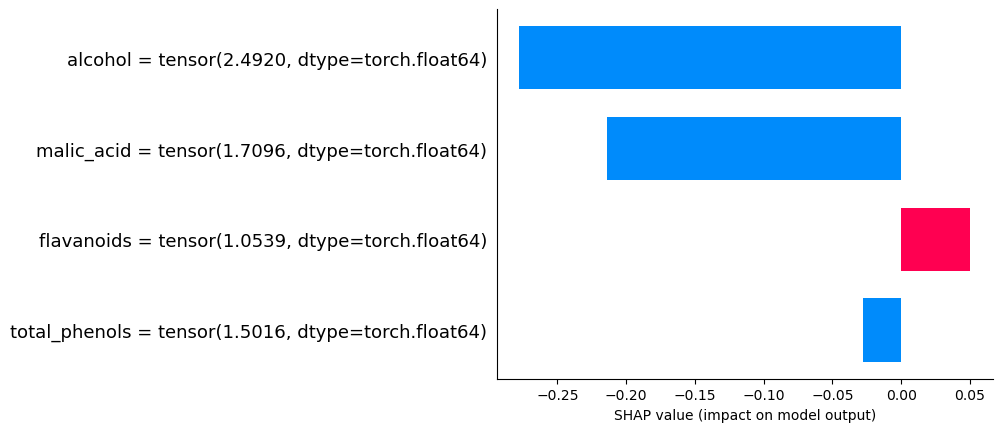

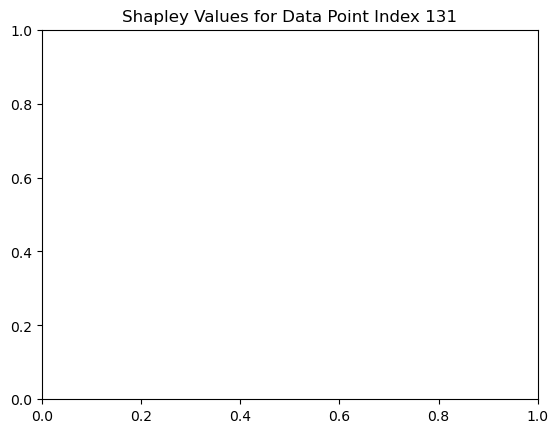

In [ ]:
# Bar plot to dipict the contributiion of each feature to all the outliers
for i in indices:
    # plt.figure()  
    bar_plot(mean_stochastic_shapley_values.T[i], x_data[i], feature_names=feature_names)
    # plt.title(f'Shapley Values for Data Point Index {i}')
    # plt.show() 